In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

In [2]:
img1  = cv2.imread('captcha001.png',0)
img2 = cv2.imread('captcha002.png',0)

In [3]:
h1,w1 = img1.shape
h2,w2= img2.shape

In [4]:
h1,w1,h2,w2

(80, 215, 80, 215)

In [5]:
def showImage(img):
    cv2.imshow('something',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

In [6]:
croppedImg1 = img1[17:66,44:171]

In [7]:
croppedImg2 = img2[17:66,44:171]

In [5]:
showImage(croppedImg2)

In [7]:
text = pytesseract.image_to_string(croppedImg1)

In [8]:
text

'Toavyz\n\nf'

In [27]:
gaus = cv2.adaptiveThreshold(croppedImg1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,31,1)

In [31]:
showImage(gaus)

In [36]:
gausAgain = cv2.adaptiveThreshold(gaus,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,111,1)

In [37]:
showImage(gausAgain)

In [29]:
textGaus = pytesseract.image_to_string(gaus)

In [30]:
text

'TavVyz\n\nd'

In [42]:
denoised = cv2.fastNlMeansDenoising(gaus, None, 3, 7)

In [43]:
showImage(denoised)

In [30]:
news1 = cv2.imread('news1.png')

In [31]:
cv2.imshow('news1',news1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
newsText = pytesseract.image_to_string(news1)

In [34]:
newsText

"ATMs Could Be Hacked Because Banks\nHaven't Updated Windows Despite 5 Years\nOf Warnings\n\nRBI has now set a 2019 deadline for an upgrade which was supposed\nto happen in 2014."

In [4]:
denoised = cv2.fastNlMeansDenoising(img1, None, 7, 21)

In [5]:
cv2.imshow('denoised',denoised)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
blurImg1 = cv2.medianBlur(croppedImg1, 3)

In [11]:
showImage(blurImg1)

In [12]:
text1 = pytesseract.image_to_string(blurImg1)

In [13]:
text1

''

In [48]:
showImage(img2)

In [68]:
gausBlurImage2 = cv2.adaptiveThreshold(blurImg2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,1)

In [90]:
showImage(gausBlurImage2)

In [85]:
_,threshold2 = cv2.threshold(blurImg2,50,255,cv2.THRESH_BINARY)
showImage(threshold2)

In [86]:
_,thresholdOtsu2 = cv2.threshold(blurImg2,50,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

showImage(thresholdOtsu2)

In [62]:
text2 = pytesseract.image_to_string(blurImg2)

In [63]:
text2

''

In [58]:
edges2 = cv2.Canny(blurImg2, 100, 200)
showImage(edges2)

In [93]:
croppedImg2.shape[1]

127

In [29]:
blurImg2 = cv2.medianBlur(croppedImg2,3)
showImage(blurImg2)

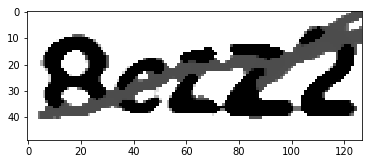

In [10]:
plt.imshow(blurImg2,cmap='gray')

In [30]:
def removeLineNoise(inputImg):
    img = inputImg
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            flag = False
            if(img[i,j]!=50 and img[i,j]!=255):
                for k in range(img.shape[0]):
                    if(img[k,j]==50):
                        flag = True

                if(flag):
                    img[i,j]=50
                else:
                    img[i,j]=255
    return img

In [31]:
outputImg2 = removeLineNoise(blurImg2)

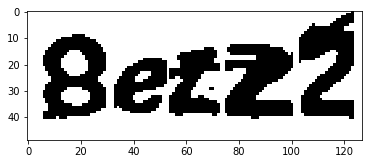

In [32]:
plt.imshow(outputImg2,cmap='gray')

In [14]:
textFromImg = pytesseract.image_to_string(outputImg2)
textFromImg

NameError: name 'outputImg2' is not defined

In [47]:
outputImg1 = removeLineNoise(blurImg1)
showImage(outputImg1)

In [50]:
textOutput1 = pytesseract.image_to_string(outputImg1)
textOutput1

'7évyz'